# Add Data

In [1]:
### General ###

import numpy as np
import pandas as pd
import calendar

#### Visualization Tools ###

# Base of sns
import matplotlib.pyplot as plt

# Born on top of matplotlib, but more attractive
import seaborn as sns

# For interactive visualization, not good for too many datapoints
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [166]:
df = pd.read_csv('./exported_data_2018-09-24_to_2023-07-14_V1.1.csv')

In [167]:
df = df.drop(columns='Unnamed: 0')

In [168]:
df['Mercado'].unique()

array(['Vega Modelo de Temuco', 'Femacal de La Calera',
       'Vega Central Mapocho de Santiago', 'Vega Monumental Concepción',
       'Central Lo Valledor de Santiago',
       'Feria Lagunitas de Puerto Montt',
       'Terminal La Palmera de La Serena', 'Macroferia Regional de Talca',
       'Terminal Hortofrutícola Agro Chillán',
       'Comercializadora del Agro de Limarí',
       'Agrícola del Norte S.A. de Arica',
       'Mapocho Venta Directa de Santiago',
       'Mercado Mayorista Lo Valledor de Santiago'], dtype=object)

In [169]:
market_name = 'Vega Modelo de Temuco'
lat, lon = -38.693614782579246, -72.52488766792806
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [170]:
market_name = 'Femacal de La Calera'
lat, lon = -32.785622816862606, -71.1884954316865
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [171]:
market_name = 'Vega Central Mapocho de Santiago'
lat, lon = -33.427611804927054, -70.64949941817034
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [172]:
market_name = 'Vega Monumental Concepción'
lat, lon = -36.807464037720756, -73.07157073479418
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [173]:
market_name = 'Central Lo Valledor de Santiago'
lat, lon = -33.481182817387094, -70.68250970411823
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [174]:
market_name = 'Feria Lagunitas de Puerto Montt'
lat, lon = -41.455866412678226, -73.00103064483459
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [175]:
market_name = 'Terminal La Palmera de La Serena'
lat, lon = -29.89028994286884, -71.25312099130934
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [176]:
market_name = 'Macroferia Regional de Talca'
lat, lon = -35.42081315536697, -71.63558080884442
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [177]:
market_name = 'Terminal Hortofrutícola Agro Chillán'
lat, lon = -36.57060167406145, -72.09974646092063
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [178]:
market_name = 'Comercializadora del Agro de Limarí'
lat, lon = -30.59589566101363, -71.19102668758502
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [179]:
market_name = 'Agrícola del Norte S.A. de Arica'
lat, lon = -18.499523817239574, -70.28420073026261
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [180]:
market_name = 'Mapocho Venta Directa de Santiago'
lat, lon = -33.4330979830953, -70.64946796447259
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [181]:
market_name = 'Mercado Mayorista Lo Valledor de Santiago'
lat, lon = -33.482984251005654, -70.68313373166113
df.loc[df['Mercado'] == market_name, 'Latitude'] = lat
df.loc[df['Mercado'] == market_name, 'Longitude'] = lon

In [182]:
df[['Latitude', 'Longitude']].isnull().sum()

Latitude     0
Longitude    0
dtype: int64

In [183]:
df[(df['Fecha'] >= '2023-01-23') & (df['Fecha'] <= '2023-01-28')]

,Variedad,Mercado,Unidad,Dia,Precio,Fecha,Volumen,Producto,Total,Latitude,Longitude
160402,Morada,Agrícola del Norte S.A. de Arica,Malla 18 kilos,Lunes,0.0,2023-01-23,0.0,Cebolla,0.0,-18.499524,-70.284201
160403,Morada,Mercado Mayorista Lo Valledor de Santiago,Malla 18 kilos,Lunes,9000.0,2023-01-23,2200.0,Cebolla,19800000.0,-33.482984,-70.683134
160404,Morada,Femacal de La Calera,Malla 18 kilos,Lunes,9250.0,2023-01-23,160.0,Cebolla,1480000.0,-32.785623,-71.188495
160405,Morada,Feria Lagunitas de Puerto Montt,Malla 18 kilos,Lunes,0.0,2023-01-23,0.0,Cebolla,0.0,-41.455866,-73.001031
160406,Morada,Terminal La Palmera de La Serena,Malla 18 kilos,Lunes,9500.0,2023-01-23,2000.0,Cebolla,19000000.0,-29.890290,-71.253121
...,...,...,...,...,...,...,...,...,...,...,...
161119,Sin especificar,Terminal Hortofrutícola Agro Chillán,Saco 20 kilos,Viernes,8250.0,2023-01-27,160.0,Zanahoria,1320000.0,-36.570602,-72.099746
161120,Sin especificar,Terminal La Palmera de La Serena,Saco 20 kilos,Viernes,5500.0,2023-01-27,600.0,Zanahoria,3300000.0,-29.890290,-71.253121
161121,Sin especificar,Vega Central Mapocho de Santiago,Saco 20 kilos,Viernes,18000.0,2023-01-27,770.0,Zanahoria,13860000.0,-33.427612,-70.649499
161122,Sin especificar,Vega Modelo de Temuco,Saco 20 kilos,Viernes,0.0,2023-01-27,0.0,Zanahoria,0.0,-38.693615,-72.524888


In [184]:
df['Unidad'] = df['Unidad'].str.upper()

In [185]:
df['Unidad'].unique(), df['Unidad'].unique().shape

(array(['MALLA 18 KILOS', 'MALLA 16 KILOS', 'CAJA 10 UNIDADES',
        'CAJA 15 UNIDADES', 'BIN (400 KILOS)', 'CAJA 16 KILOS EMPEDRADA',
        'CAJA 15 KILOS GRANEL', 'KILO (EN CAJA DE 15 KILOS)',
        'KILO (EN CAJA DE 17 KILOS)', 'SACO 25 KILOS', 'MALLA 25 KILOS',
        'BIN (450 KILOS)', 'CAJA 18 KILOS EMPEDRADA', 'BANDEJA 18 KILOS',
        'CAJA 12 KILOS', 'SACO 20 KILOS', 'UNIDAD', 'MALLA 15 KILOS',
        'PAQUETE 20 UNIDADES', 'PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)',
        'BANDEJA 10 KILOS', '$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)',
        'CAJA 16 KILOS', 'CAJA 20 KILOS', 'CAJA 15 KILOS',
        'CAJA 15 KILOS EMPEDRADA', 'MALLA 17 KILOS',
        'KILO (EN CAJA DE 18 KILOS)', 'BANDEJA 8 KILOS', 'CAJA 14 KILOS',
        'CAJA 18 KILOS', 'CAJA 10 KILOS', 'BANDEJA 9 KILOS',
        'BANDEJA 12 KILOS', 'MALLA 20 KILOS',
        'PAQUETE 10 UNIDADES (VOLUMEN EN UNIDADES)', 'MALLA 13 KILOS',
        'BANDEJA 15 KILOS GRANEL', 'BANDEJA 18 KILOS GRANEL',
      

In [186]:
unit = 'KILO'
df.loc[df['Unidad'].str.contains(unit),'Unidad'].unique(), df.loc[df['Unidad'].str.contains(unit),'Unidad'].unique().shape

(array(['MALLA 18 KILOS', 'MALLA 16 KILOS', 'BIN (400 KILOS)',
        'CAJA 16 KILOS EMPEDRADA', 'CAJA 15 KILOS GRANEL',
        'KILO (EN CAJA DE 15 KILOS)', 'KILO (EN CAJA DE 17 KILOS)',
        'SACO 25 KILOS', 'MALLA 25 KILOS', 'BIN (450 KILOS)',
        'CAJA 18 KILOS EMPEDRADA', 'BANDEJA 18 KILOS', 'CAJA 12 KILOS',
        'SACO 20 KILOS', 'MALLA 15 KILOS', 'BANDEJA 10 KILOS',
        'CAJA 16 KILOS', 'CAJA 20 KILOS', 'CAJA 15 KILOS',
        'CAJA 15 KILOS EMPEDRADA', 'MALLA 17 KILOS',
        'KILO (EN CAJA DE 18 KILOS)', 'BANDEJA 8 KILOS', 'CAJA 14 KILOS',
        'CAJA 18 KILOS', 'CAJA 10 KILOS', 'BANDEJA 9 KILOS',
        'BANDEJA 12 KILOS', 'MALLA 20 KILOS', 'MALLA 13 KILOS',
        'BANDEJA 15 KILOS GRANEL', 'BANDEJA 18 KILOS GRANEL',
        'CAJA 13 KILOS', 'KILO (EN CAJA DE 8 KILOS )',
        'CAJA 18 KILOS GRANEL'], dtype=object),
 (35,))

In [187]:
unit = 'UNIDAD'
df.loc[df['Unidad'].str.contains(unit),'Unidad'].unique(), df.loc[df['Unidad'].str.contains(unit),'Unidad'].unique().shape

(array(['CAJA 10 UNIDADES', 'CAJA 15 UNIDADES', 'UNIDAD',
        'PAQUETE 20 UNIDADES', 'PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)',
        '$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)',
        'PAQUETE 10 UNIDADES (VOLUMEN EN UNIDADES)'], dtype=object),
 (7,))

In [188]:
df.loc[df['Unidad'] == 'UNIDAD', 'Unidad'] = '1 UNIDADES'

In [189]:
df['Unidad'].str.extract(r'(\d+) (\w+)')[1].unique()

array(['KILOS', 'UNIDADES'], dtype=object)

In [190]:
df[['Numero Unidad', 'Nombre Unidad']] = df['Unidad'].str.extract(r'(\d+) (\w+)')

In [193]:
df.isnull().sum()

Variedad           0
Mercado            0
Unidad             0
Dia                0
Precio           571
Fecha              0
Volumen          348
Producto           0
Total            919
Latitude           0
Longitude          0
Numero Unidad      0
Nombre Unidad      0
dtype: int64

In [194]:
df.to_csv('./exported_data_2018-09-24_to_2023-07-14_V1.2.csv')

# Fixing errors in Data (1.3)

In [80]:
df = pd.read_csv('./exported_data_2018-09-24_to_2023-07-14_V1.2.csv')
print(df.shape)
df.drop(columns=['Unnamed: 0', 'Total'], inplace=True)
df.head()

(181409, 14)


,Variedad,Mercado,Unidad,Dia,Precio,Fecha,Volumen,Producto,Latitude,Longitude,Numero Unidad,Nombre Unidad
0,Morada,Vega Modelo de Temuco,MALLA 18 KILOS,Lunes,0.0000,2018-09-24,0.0,Cebolla,-38.693615,-72.524888,18,KILOS
1,Sin especificar,Femacal de La Calera,MALLA 18 KILOS,Lunes,6777.7759,2018-09-24,180.0,Cebolla,-32.785623,-71.188495,18,KILOS
2,Sin especificar,Vega Central Mapocho de Santiago,MALLA 18 KILOS,Lunes,0.0000,2018-09-24,0.0,Cebolla,-33.427612,-70.649499,18,KILOS
3,Sin especificar,Vega Monumental Concepción,MALLA 18 KILOS,Lunes,0.0000,2018-09-24,0.0,Cebolla,-36.807464,-73.071571,18,KILOS
4,Sin especificar,Central Lo Valledor de Santiago,MALLA 16 KILOS,Lunes,8830.4307,2018-09-24,2300.0,Cebolla,-33.481183,-70.682510,16,KILOS


In [81]:
df_drop = df.drop(index=df[df['Volumen'] <= 0].index)
df_drop[df_drop['Volumen'] <= 0].shape[0], df_drop[df_drop['Volumen'] > 0].shape[0]
df_drop = df_drop.drop(index=df_drop[df_drop['Precio'] <= 0].index)
df_drop[df_drop['Precio'] <= 0].shape[0], df_drop[df_drop['Precio'] > 0].shape[0]
df_drop = df_drop.reset_index(drop=True)
print(df_drop.shape)
df_drop.head()

(112922, 12)


,Variedad,Mercado,Unidad,Dia,Precio,Fecha,Volumen,Producto,Latitude,Longitude,Numero Unidad,Nombre Unidad
0,Sin especificar,Femacal de La Calera,MALLA 18 KILOS,Lunes,6777.7759,2018-09-24,180.0,Cebolla,-32.785623,-71.188495,18,KILOS
1,Sin especificar,Central Lo Valledor de Santiago,MALLA 16 KILOS,Lunes,8830.4307,2018-09-24,2300.0,Cebolla,-33.481183,-70.682510,16,KILOS
2,Sin especificar,Terminal La Palmera de La Serena,MALLA 16 KILOS,Lunes,8950.0019,2018-09-24,1140.0,Cebolla,-29.890290,-71.253121,16,KILOS
3,Sin especificar,Vega Central Mapocho de Santiago,MALLA 18 KILOS,Martes,10727.2669,2018-09-25,550.0,Cebolla,-33.427612,-70.649499,18,KILOS
4,Sin especificar,Central Lo Valledor de Santiago,MALLA 16 KILOS,Martes,8732.1486,2018-09-25,2800.0,Cebolla,-33.481183,-70.682510,16,KILOS


In [82]:
df_drop['Unidad'].unique()

array(['MALLA 18 KILOS', 'MALLA 16 KILOS', 'CAJA 10 UNIDADES',
       'CAJA 15 UNIDADES', 'BIN (400 KILOS)', 'CAJA 16 KILOS EMPEDRADA',
       'CAJA 15 KILOS GRANEL', 'KILO (EN CAJA DE 15 KILOS)',
       'KILO (EN CAJA DE 17 KILOS)', 'SACO 25 KILOS', 'MALLA 25 KILOS',
       'BIN (450 KILOS)', 'CAJA 18 KILOS EMPEDRADA', 'BANDEJA 18 KILOS',
       'CAJA 12 KILOS', 'SACO 20 KILOS', '1 UNIDADES', 'MALLA 15 KILOS',
       'PAQUETE 20 UNIDADES', 'PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)',
       'BANDEJA 10 KILOS', '$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)',
       'CAJA 16 KILOS', 'CAJA 20 KILOS', 'CAJA 15 KILOS',
       'CAJA 15 KILOS EMPEDRADA', 'MALLA 17 KILOS',
       'KILO (EN CAJA DE 18 KILOS)', 'BANDEJA 8 KILOS', 'CAJA 14 KILOS',
       'CAJA 18 KILOS', 'CAJA 10 KILOS', 'BANDEJA 9 KILOS',
       'BANDEJA 12 KILOS', 'MALLA 20 KILOS',
       'PAQUETE 10 UNIDADES (VOLUMEN EN UNIDADES)', 'MALLA 13 KILOS',
       'BANDEJA 15 KILOS GRANEL', 'BANDEJA 18 KILOS GRANEL',
       'CAJA 13 K

In [83]:
df_drop.loc[df_drop['Unidad'].str[:4] == 'KILO', 'Numero Unidad'] = 1
df_drop[df_drop['Unidad'].str[:4] == 'KILO'].head()

,Variedad,Mercado,Unidad,Dia,Precio,Fecha,Volumen,Producto,Latitude,Longitude,Numero Unidad,Nombre Unidad
254,Edranol,Femacal de La Calera,KILO (EN CAJA DE 15 KILOS),Lunes,1499.9950,2018-09-24,38.0,Palta,-32.785623,-71.188495,1,KILOS
255,Edranol,Terminal La Palmera de La Serena,KILO (EN CAJA DE 15 KILOS),Lunes,1824.9959,2018-09-24,240.0,Palta,-29.890290,-71.253121,1,KILOS
256,Fuerte,Femacal de La Calera,KILO (EN CAJA DE 15 KILOS),Lunes,1499.9950,2018-09-24,42.0,Palta,-32.785623,-71.188495,1,KILOS
257,Negra de la Cruz,Femacal de La Calera,KILO (EN CAJA DE 15 KILOS),Lunes,1600.0026,2018-09-24,65.0,Palta,-32.785623,-71.188495,1,KILOS
258,Edranol,Vega Central Mapocho de Santiago,KILO (EN CAJA DE 17 KILOS),Lunes,1999.9973,2018-09-24,65.0,Palta,-33.427612,-70.649499,1,KILOS


In [84]:
print(df_drop[df_drop['Unidad'] == 'PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)'].shape)
df_drop[df_drop['Unidad'] == 'PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)'].head()

(709, 12)


,Variedad,Mercado,Unidad,Dia,Precio,Fecha,Volumen,Producto,Latitude,Longitude,Numero Unidad,Nombre Unidad
2208,Sin especificar,Central Lo Valledor de Santiago,PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Lunes,2504.0575,2018-10-29,148000.0,Cebolla,-33.481183,-70.682510,20,UNIDADES
2209,Sin especificar,Femacal de La Calera,PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Lunes,2588.8926,2018-10-29,15300.0,Cebolla,-32.785623,-71.188495,20,UNIDADES
2213,Sin especificar,Central Lo Valledor de Santiago,PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Martes,2299.3894,2018-10-30,163000.0,Cebolla,-33.481183,-70.682510,20,UNIDADES
2214,Sin especificar,Femacal de La Calera,PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Martes,2400.0039,2018-10-30,11600.0,Cebolla,-32.785623,-71.188495,20,UNIDADES
2215,Sin especificar,Vega Monumental Concepción,PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Martes,2542.8515,2018-10-30,7000.0,Cebolla,-36.807464,-73.071571,20,UNIDADES


In [85]:
print(df_drop[df_drop['Unidad'] == '$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)'].shape)
df_drop[df_drop['Unidad'] == '$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)'].head()

(13, 12)


,Variedad,Mercado,Unidad,Dia,Precio,Fecha,Volumen,Producto,Latitude,Longitude,Numero Unidad,Nombre Unidad
4349,Sin especificar,Central Lo Valledor de Santiago,$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Lunes,1302.9429,2018-12-03,68000.0,Cebolla,-33.481183,-70.682510,20,UNIDADES
4356,Sin especificar,Central Lo Valledor de Santiago,$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Martes,1890.2198,2018-12-04,133000.0,Cebolla,-33.481183,-70.682510,20,UNIDADES
4357,Sin especificar,Femacal de La Calera,$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Martes,2400.0039,2018-12-04,12000.0,Cebolla,-32.785623,-71.188495,20,UNIDADES
4358,Sin especificar,Vega Central Mapocho de Santiago,$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Martes,2445.4500,2018-12-04,11000.0,Cebolla,-33.427612,-70.649499,20,UNIDADES
4364,Sin especificar,Central Lo Valledor de Santiago,$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES),Miércoles,1783.1198,2018-12-05,154000.0,Cebolla,-33.481183,-70.682510,20,UNIDADES


In [92]:
df_drop.loc[df_drop['Unidad'] == '$/PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)', 'Unidad'] = 'PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)'

In [100]:
df_drop.loc[df_drop['Unidad'] == 'PAQUETE 20 UNIDADES', 'Unidad'] = 'PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)'

In [104]:
df_drop.loc[df_drop['Unidad'] == 'PAQUETE 20 UNIDADES (VOLUMEN EN UNIDADES)', 'Unidad'] = 'PAQUETE 20 UNIDADES'
df_drop.loc[df_drop['Unidad'] == 'PAQUETE 10 UNIDADES (VOLUMEN EN UNIDADES)', 'Unidad'] = 'PAQUETE 10 UNIDADES'
df_drop.loc[df_drop['Unidad'] == 'PAQUETE 10 UNIDADES', 'Volumen'] = df_drop[df_drop['Unidad'] == 'PAQUETE 10 UNIDADES']['Volumen'] / 10
df_drop.loc[df_drop['Unidad'] == 'PAQUETE 20 UNIDADES', 'Volumen'] = df_drop[df_drop['Unidad'] == 'PAQUETE 20 UNIDADES']['Volumen'] / 20

In [105]:
a = df_drop.copy()
a['Fecha'] = pd.to_datetime(a['Fecha'])
a = a[a['Producto'] == 'Cebolla']
a = a.groupby(['Fecha', 'Producto', 'Unidad']).Volumen.mean().reset_index()

px.line(a, x='Fecha', y='Volumen', color='Unidad')

In [123]:
a = df_drop.copy()
a['Fecha'] = pd.to_datetime(a['Fecha'])
a['Periodo'] = a['Fecha'].dt.year
a = a[a['Producto'] == 'Cebolla']
a = a.groupby(['Periodo', 'Producto', 'Unidad']).Precio.mean().reset_index()

px.line(a, x='Periodo', y='Precio', color='Unidad')

In [106]:
a = df_drop.copy()
a['Fecha'] = pd.to_datetime(a['Fecha'])
a = a[a['Producto'] == 'Cebolla']
a = a.groupby(['Fecha', 'Producto', 'Unidad']).Precio.mean().reset_index()

print(a[a['Unidad'] == 'PAQUETE 20 UNIDADES'].describe())
print(a[a['Unidad'] == 'MALLA 18 KILOS'].describe())

            Precio
count   315.000000
mean   2288.960231
std     821.267732
min    1089.000000
25%    1649.750000
50%    2066.000000
75%    2730.416667
max    4577.000000
             Precio
count   1152.000000
mean    7795.271270
std     2250.675233
min     3800.000000
25%     6105.205357
50%     7614.433333
75%     9079.937500
max    18000.000000


<AxesSubplot: >

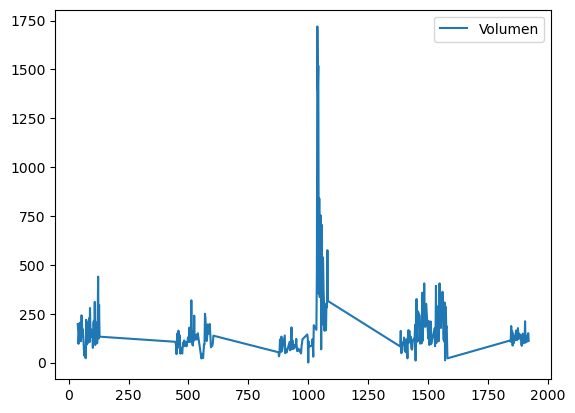

In [115]:
a = df_drop.copy()
a['Fecha'] = pd.to_datetime(a['Fecha'])
a = a[a['Producto'] == 'Cebolla']
a = a.groupby(['Fecha', 'Producto', 'Unidad']).Volumen.mean().reset_index()
b = pd.DataFrame(a[a['Unidad'] == 'PAQUETE 20 UNIDADES']['Volumen']/20)
b.describe()
b.plot()

In [86]:
df.to_csv('./exported_data_2018-09-24_to_2023-07-14_V1.3.csv')